## 数理最適化

##### アルゴリズムの実装


In [4]:
import numpy as np


class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None

    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

5x^2 - 6xy + 3y^2 + 6x - 6yの最適化計算

C:\Users\523m2\AppData\Local\Temp\ipykernel_25800\2363333623.py:17: RuntimeWarning: overflow encountered in square
  while (grad**2).sum() > self.eps**2:
C:\Users\523m2\AppData\Local\Temp\ipykernel_25800\3279624440.py:12: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])
C:\Users\523m2\AppData\Local\Temp\ipykernel_25800\3279624440.py:12: RuntimeWarning: overflow encountered in scalar add
  return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])
C:\Users\523m2\AppData\Local\Temp\ipykernel_25800\2363333623.py:18: RuntimeWarning: invalid value encountered in subtract
  x = x - self.alpha * grad


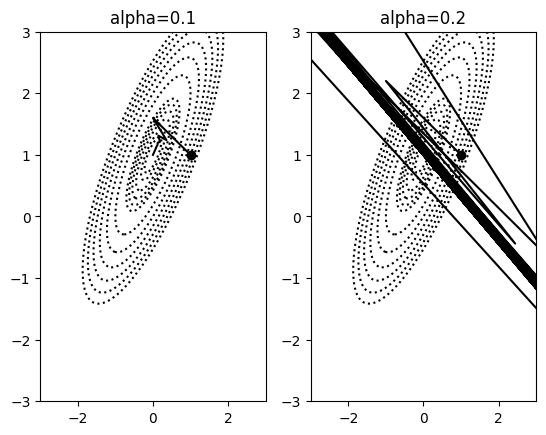

In [5]:
import matplotlib.pyplot as plt

def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)


xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2)
levels = [-3, -2.9, -2.8, -2.6, -2.4,
          -2.2, -2, -1, 0, 1, 2, 3, 4]
for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[
               :, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape),
                  levels=levels,
                  colors="k",  linestyles="dotted")


plt.show()


#### ニュートン法
アルゴリズムの実装

In [2]:
from numpy import linalg


class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter

    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(linalg.inv(self.df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if ((x-x_new)**2).sum() < self.eps*self.eps:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


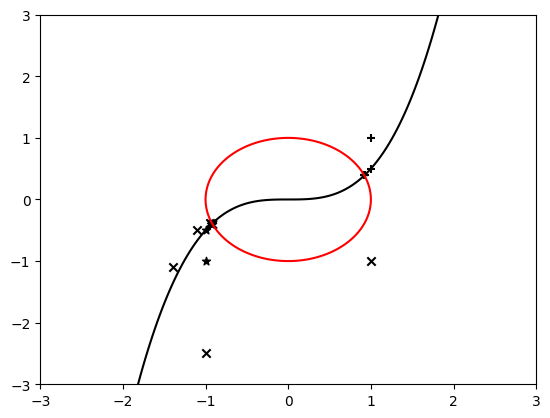

In [6]:
def f1(x, y):
    return x**3-2*y


def f2(x, y):
    return x**2+y**2-1


def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])


def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])


xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors="k", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="r", levels=[0])
solver = Newton(f, df)

initials = [np.array([1, 1]),
            np.array([-1, -1]),
            np.array([1, -1])]
markers = ["+", "*", "x"]

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0],
                solver.path_[:, 1], color="k", marker=m)
    print(sol)

plt.show()
